# **Titanic Survival Prediction**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## **Reading & Exploring Dataset**

In [2]:
data=pd.read_csv("/content/titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.shape

(891, 12)

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Checking null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Removing data with null values
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
data=data.drop('Name',axis=1)

## **Exploratory Data Analysis**

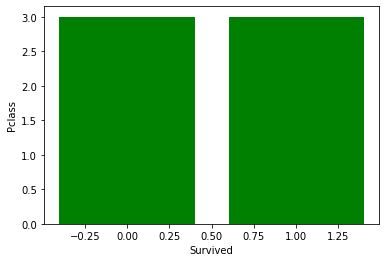

In [12]:
plt.bar(data['Survived'],data['Pclass'],color='g')
plt.ylabel('Pclass')
plt.xlabel('Survived')
plt.show()

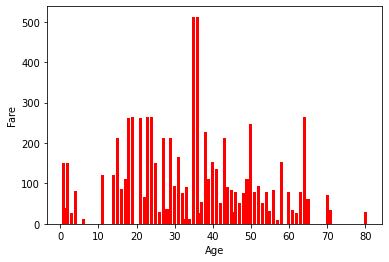

In [13]:
plt.bar(data['Age'],data['Fare'],color='r')
plt.ylabel('Fare')
plt.xlabel('Age')
plt.show()

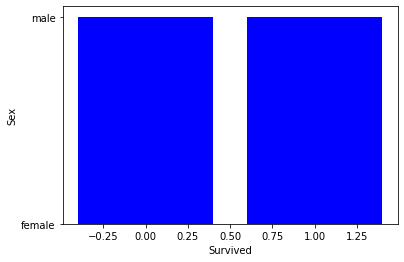

In [14]:
plt.bar(data['Survived'],data['Sex'],color='b')
plt.ylabel('Sex')
plt.xlabel('Survived')
plt.show()

HISTOGRAM

(array([72., 70., 24.,  1.,  8.,  6.,  0.,  0.,  0.,  2.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

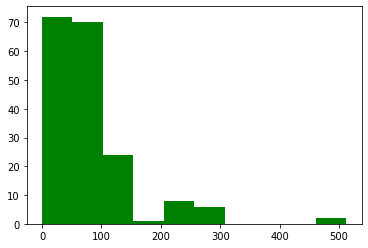

In [15]:
plt.hist(data['Fare'],color='g')

(array([158.,   0.,   0.,   0.,   0.,  15.,   0.,   0.,   0.,  10.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

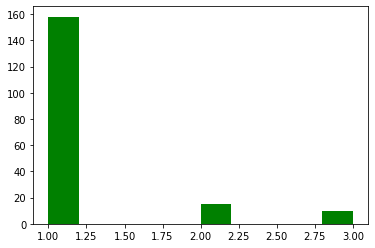

In [16]:
plt.hist(data['Pclass'],color='g')

(array([10.,  6., 32., 30., 40., 24., 23., 13.,  4.,  1.]),
 array([ 0.92 ,  8.828, 16.736, 24.644, 32.552, 40.46 , 48.368, 56.276,
        64.184, 72.092, 80.   ]),
 <a list of 10 Patch objects>)

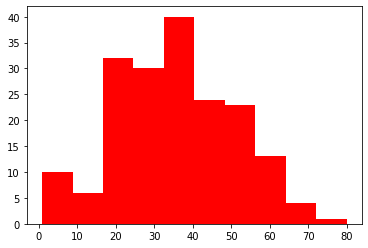

In [17]:
plt.hist(data['Age'],color='r')

(array([122.,   0.,  37.,   0.,   0.,  23.,   0.,   0.,   0.,   1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

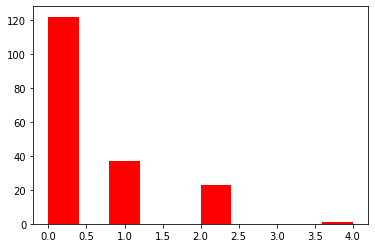

In [18]:
plt.hist(data['Parch'],color='r')

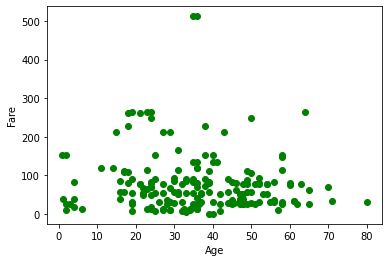

In [19]:
plt.scatter(data['Age'],data['Fare'],color='g')
plt.ylabel('Fare')
plt.xlabel('Age')
plt.show()

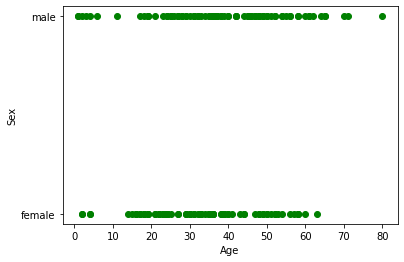

In [20]:
plt.scatter(data['Age'],data['Sex'],color='g')
plt.ylabel('Sex')
plt.xlabel('Age')
plt.show()

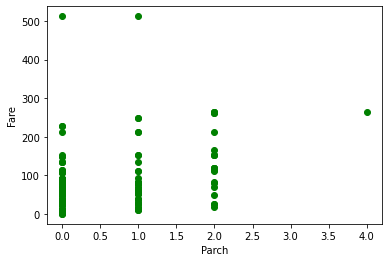

In [21]:
plt.scatter(data['Parch'],data['Fare'],color='g')
plt.ylabel('Fare')
plt.xlabel('Parch')
plt.show()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


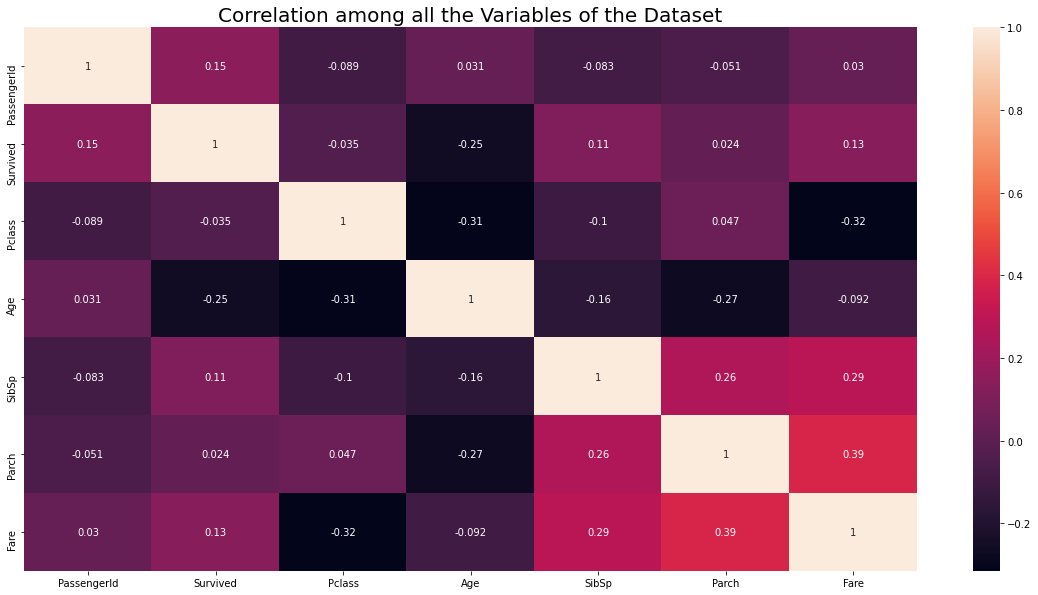

In [22]:

#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

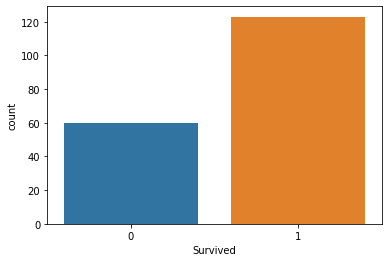

In [23]:
sns.countplot(x='Survived',data=data)

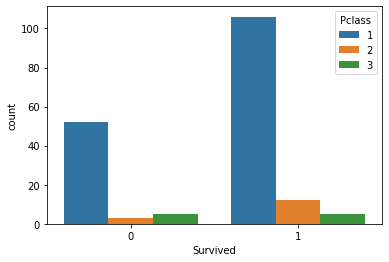

In [24]:
sns.countplot(x='Survived',hue='Pclass',data=data)

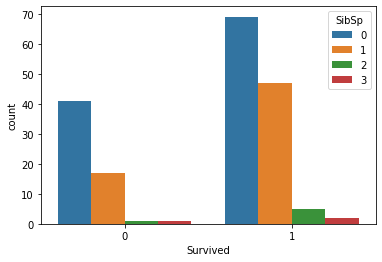

In [25]:
sns.countplot(x='Survived',hue='SibSp',data=data)

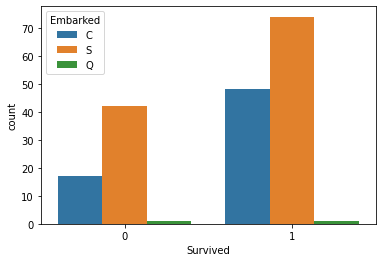

In [26]:
sns.countplot(x='Survived',hue='Embarked',data=data)

In [27]:
survived=data[data['Survived']==1]
not_survived=data[data['Survived']==0]

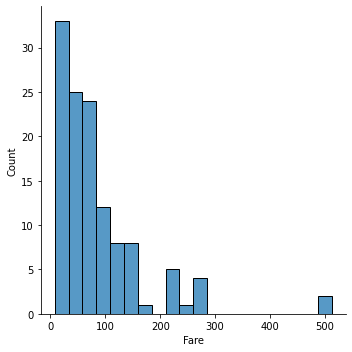

In [28]:
sns.displot(survived['Fare'])

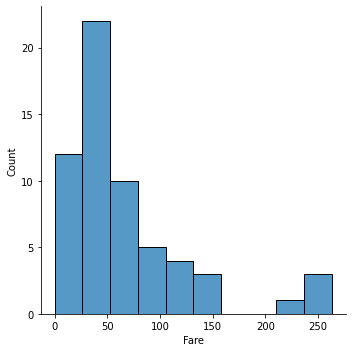

In [29]:
sns.displot(not_survived['Fare'])

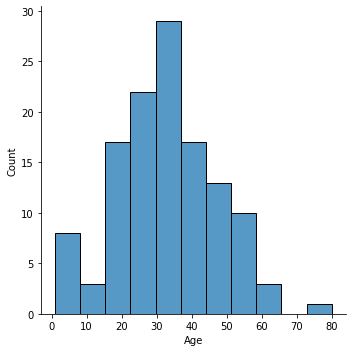

In [30]:
sns.displot(survived['Age'])

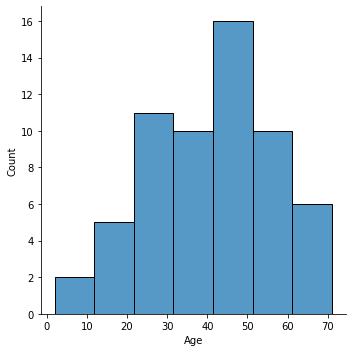

In [31]:
sns.displot(not_survived['Age'])

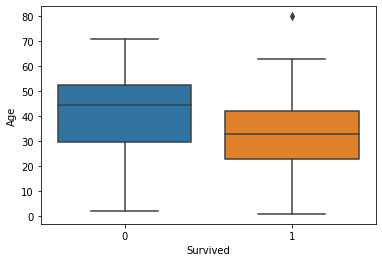

In [32]:
sns.boxplot(x='Survived',y='Age',data=data)

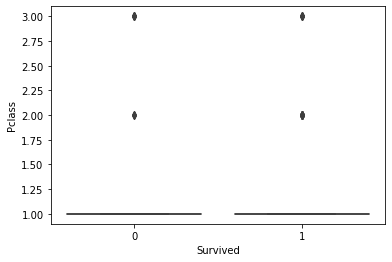

In [33]:
sns.boxplot(x='Survived',y='Pclass',data=data)

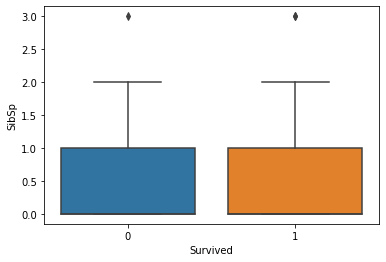

In [34]:
sns.boxplot(x='Survived',y='SibSp',data=data)

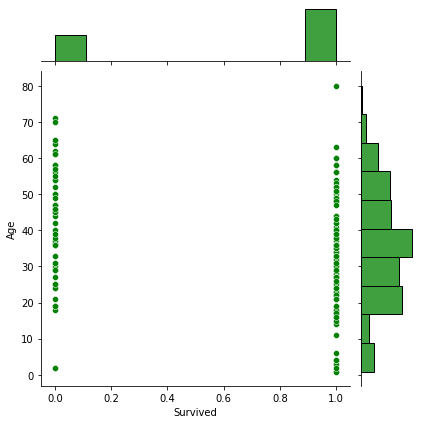

In [35]:
sns.jointplot(x='Survived',y='Age',data=data,color='g')

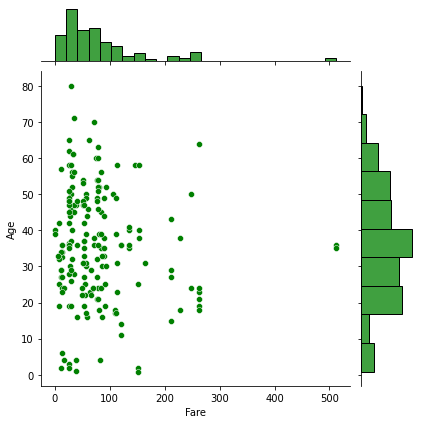

In [36]:
sns.jointplot(x='Fare',y='Age',data=data,color='g')

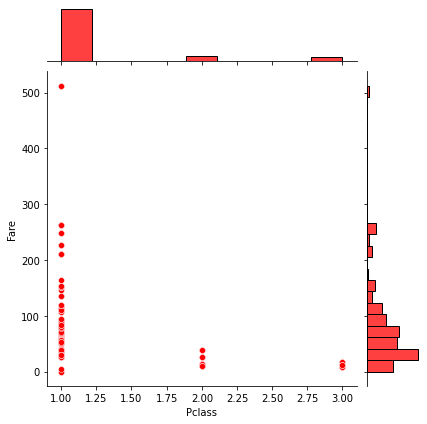

In [37]:
sns.jointplot(x='Pclass',y='Fare',data=data,color='r')

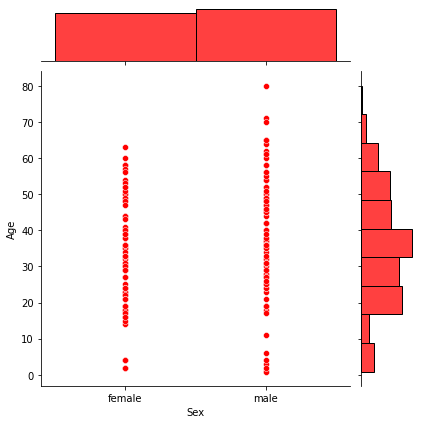

In [38]:
sns.jointplot(x='Sex',y='Age',data=data,color='r')

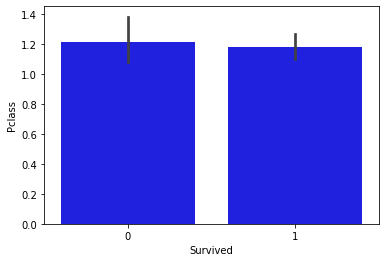

In [39]:
sns.barplot(x='Survived',y='Pclass',data=data,color='b')

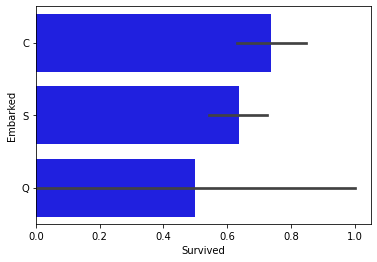

In [40]:
sns.barplot(x='Survived',y='Embarked',data=data,color='b')

## **Dealing with Categorical variables**

In [41]:
data['Cabin'].unique()


array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'D33', 'B30', 'C83', 'F33', 'F G73', 'E31', 'A5', 'D10 D12', 'D26',
       'C110', 'B58 B60', 'E101', 'D47', 'B86', 'F2', 'C2', 'B19', 'A7',
       'C49', 'F4', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'B49',
       'D', 'C22 C26', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'E33', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'C52', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'E12', 'E63', 'B37', 'C30', 'D20', 'B79',
       'E25', 'D46', 'B73', 'B38', 'B39', 'B22', 'C86', 'C70', 'A16',
       'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50', 'D9',
       'A23', 'B50', 'A26', 'D48', 'E58', 'B71', 'B51 B53 B55', 'D49',
       'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90', 'C126', 'C45', 'E8',
       'B101', 'C46', 'D30', 'E121', 'D11', 'E77', 'B3', 'D6', 'B

In [42]:
data['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [43]:
data['Pclass'].unique()


array([1, 3, 2])

In [44]:
features = ["Sex","Embarked"]
dummy = pd.get_dummies(data[features],drop_first=True)
dummy.head()

,Sex_male,Embarked_Q,Embarked_S
1,0,0,0
3,0,0,1
6,1,0,1
10,0,0,1
11,0,0,1


In [45]:
data.drop(["Sex","Embarked","PassengerId","Ticket","Cabin"],axis=1,inplace=True)


In [46]:
data=pd.concat([data,dummy],axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1


In [47]:
data.shape


(183, 9)

## **Checking Multicollinearity using VIF**

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']]

vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,4.020724,Pclass
1,4.020472,Age
2,1.763988,SibSp
3,1.883736,Parch
4,2.507638,Fare
5,2.135732,Sex_male
6,1.075524,Embarked_Q
7,3.015480,Embarked_S


In [49]:
x=data.drop('Survived',axis=1)
y=data['Survived']

## **Feature Scaling**

In [50]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

## **Split data into training and testing**

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## **Predictive Modelling**

### **Logistic Regression**

In [52]:

from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Logistic Regression\n")
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred)
print("\nAccuracy=",acc)

Logistic Regression

Confusion Matrix:

 [[ 5  2]
 [ 3 27]]

Accuracy= 0.8648648648648649


### **Decision Tree Classifier**

In [53]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(random_state=0)
dc.fit(x_train,y_train)
y_pred2=dc.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Decision Tree Classifier\n")
cm=confusion_matrix(y_test,y_pred2)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred2)
print("\nAccuracy=",acc)

Decision Tree Classifier

Confusion Matrix:

 [[ 4  3]
 [ 4 26]]

Accuracy= 0.8108108108108109


### **Random Forest Classifier**

In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)
y_pred3=classifier.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Random Forest Classifier\n")
cm=confusion_matrix(y_test,y_pred3)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred3)
print("\nAccuracy=",acc)

Random Forest Classifier

Confusion Matrix:

 [[ 5  2]
 [ 2 28]]

Accuracy= 0.8918918918918919


### **K Nearest Neighbor Classifier**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train,y_train)
y_pred4=classifier.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("K Nearest Neighbor Classifier\n")
cm=confusion_matrix(y_test,y_pred4)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred4)
print("\nAccuracy=",acc)

K Nearest Neighbor Classifier

Confusion Matrix:

 [[ 2  5]
 [ 8 22]]

Accuracy= 0.6486486486486487


### **Gradient Boosting Classifier**

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred5=gb.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Gradient Boosting Classifier\n")
cm=confusion_matrix(y_test,y_pred5)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred5)
print("\nAccuracy=",acc)

Gradient Boosting Classifier

Confusion Matrix:

 [[ 4  3]
 [ 3 27]]

Accuracy= 0.8378378378378378


### **Support Vector Classifier**

In [57]:
from sklearn.svm import SVC
sv=SVC(kernel = 'linear')
sv.fit(x_train,y_train)
y_pred6=sv.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Support Vector Classifier\n")
cm=confusion_matrix(y_test,y_pred6)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred6)
print("\nAccuracy=",acc)

Support Vector Classifier

Confusion Matrix:

 [[ 6  1]
 [ 4 26]]

Accuracy= 0.8648648648648649


### **Naive Bayes Classifier**

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred7=gnb.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Naive Bayes Classifier\n")
cm=confusion_matrix(y_test,y_pred7)
print("Confusion Matrix:\n\n",cm)
acc=accuracy_score(y_test,y_pred7)
print("\nAccuracy=",acc)

Naive Bayes Classifier

Confusion Matrix:

 [[ 5  2]
 [ 6 24]]

Accuracy= 0.7837837837837838


In [59]:
# Prediction of Random Forest Classifier Model
y_pred3

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

## **Conclusion**

Random Forest Classifier is the best classification model as it gives highest accuracy among all models.